In [12]:
import os
import numpy as np
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import load_img, img_to_array

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight


Dataset Description

This study investigates rice leaf disease classification under limited data conditions.
The dataset contains three classes: Bacterial Blight, Blast, and Brown Spot, with a very small number of samples per class.
Due to data scarcity, model evaluation is performed using stratified k-fold cross-validation.

In [47]:
train_dir = r"G:\My Drive\rice-plant-diseases-detection\rice_leaf_diseases\paddy_leaf_reformat\train"
val_dir   =r"G:\My Drive\rice-plant-diseases-detection\rice_leaf_diseases\paddy_leaf_reformat\valid"

In [48]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

IMG_SIZE = 224
BATCH_SIZE = 16

train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

val_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

train_data = train_gen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

val_data = val_gen.flow_from_directory(
    val_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)


Found 252 images belonging to 3 classes.
Found 24 images belonging to 3 classes.


Stratification ensures each fold preserves class distribution.

In [49]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model

base_model = MobileNetV2(
    weights="imagenet",
    include_top=False,
    input_shape=(224,224,3)
)

base_model.trainable = False  # Stage 1

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.4)(x)
output = Dense(3, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=output)


In [50]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.6111 - loss: 0.8418 - val_accuracy: 0.8750 - val_loss: 0.2719
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.8452 - loss: 0.3681 - val_accuracy: 0.8750 - val_loss: 0.1878
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.9167 - loss: 0.2289 - val_accuracy: 0.9167 - val_loss: 0.2026
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.9365 - loss: 0.1715 - val_accuracy: 1.0000 - val_loss: 0.0890
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.9444 - loss: 0.1318 - val_accuracy: 0.9583 - val_loss: 0.1032
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.9762 - loss: 0.0923 - val_accuracy: 0.9583 - val_loss: 0.0868
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.9722 - loss: 0.0973 - val_accuracy: 1.0000 - val_loss: 0.0688
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.9881 - loss: 0.0467 - val_accuracy: 0.9583 - val_loss:

In [51]:
model.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_7[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,751,051 (10.49 MB)

 Trainable params: 164,355 (642.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 328,712 (1.25 MB)

In [52]:
base_model.trainable = True

for layer in base_model.layers[:-30]:
    layer.trainable = False

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)


Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.9008 - loss: 0.2637 - val_accuracy: 1.0000 - val_loss: 0.0513
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.9008 - loss: 0.2578 - val_accuracy: 1.0000 - val_loss: 0.0494
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.9286 - loss: 0.1770 - val_accuracy: 1.0000 - val_loss: 0.0500
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.9246 - loss: 0.1958 - val_accuracy: 1.0000 - val_loss: 0.0513
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.9405 - loss: 0.1555 - val_accuracy: 1.0000 - val_loss: 0.0538
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.9563 - loss: 0.1554 - val_accuracy: 1.0000 - val_loss: 0.0525
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.9325 - loss: 0.1668 - val_accuracy: 1.0000 - val_loss: 0.0518
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.9603 - loss: 0.1234 - val_accuracy: 1.0000 - val_loss:

In [53]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
val_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input  # or rescale=1./255
)

val_data = val_gen.flow_from_directory(
    val_dir,
    target_size=(224,224),
    batch_size=16,
    class_mode="categorical",
    shuffle=False
)


Found 24 images belonging to 3 classes.


In [55]:
y_true = val_data.classes
class_names = list(val_data.class_indices.keys())

In [56]:
class_names

['BacterialBlight', 'Blast', 'BrownSpot']

In [57]:
y_pred_prob = model.predict(val_data)
y_pred = np.argmax(y_pred_prob, axis=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step


In [58]:
print(classification_report(
    y_true,
    y_pred,
    target_names=class_names
))

                 precision    recall  f1-score   support

BacterialBlight       1.00      1.00      1.00        12
          Blast       1.00      1.00      1.00         4
      BrownSpot       1.00      1.00      1.00         8

       accuracy                           1.00        24
      macro avg       1.00      1.00      1.00        24
   weighted avg       1.00      1.00      1.00        24



In [59]:
cm = confusion_matrix(y_true, y_pred)

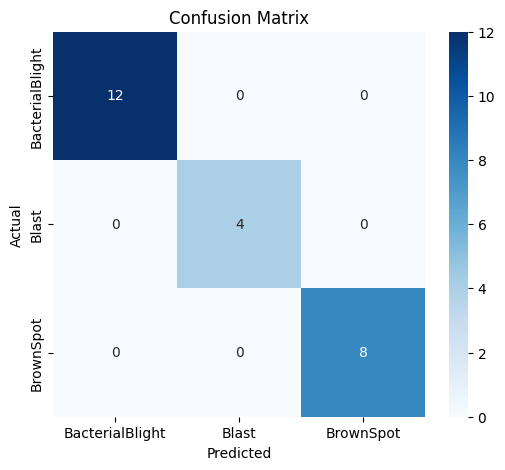

In [60]:
plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [61]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt


def make_gradcam_heatmap(img_array, model, last_conv_layer_name):
    grad_model = tf.keras.models.Model(
        inputs=model.input,
        outputs=[
            model.get_layer(last_conv_layer_name).output,
            model.output
        ]
    )

    with tf.GradientTape() as tape:
        conv_output, predictions = grad_model(img_array)
        class_idx = tf.argmax(predictions[0])
        loss = predictions[:, class_idx]

    grads = tape.gradient(loss, conv_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_output = conv_output[0]
    heatmap = conv_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


In [62]:
img_path = r"G:\My Drive\rice-plant-diseases-detection\rice_leaf_diseases\paddy_leaf_reformat\test\BacterialBlight\DSC_0406_JPG.rf.9ecd710ae6e4528bb4be19857032402a.jpg"

img = cv2.imread(img_path)
img = cv2.resize(img, (224,224))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_norm = img_rgb / 255.0
img_array = np.expand_dims(img_norm, axis=0)


In [63]:
heatmap = make_gradcam_heatmap(
    img_array,
    model,
    last_conv_layer_name="Conv1"
)


print(heatmap.shape)


(112, 112)


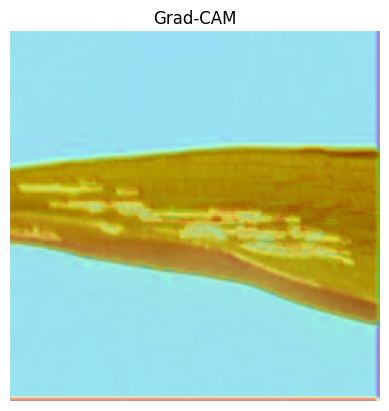

In [64]:
heatmap = cv2.resize(heatmap, (224,224))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

superimposed_img = cv2.addWeighted(
    img_rgb, 0.6, heatmap, 0.4, 0
)

plt.imshow(superimposed_img)
plt.axis("off")
plt.title("Grad-CAM")
plt.show()

In [65]:
test_dir=r"G:\My Drive\rice-plant-diseases-detection\rice_leaf_diseases\paddy_leaf_reformat\test"

In [66]:
test_data = val_gen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=16,
    class_mode="categorical",
    shuffle=False
)

model.evaluate(test_data)

Found 12 images belonging to 3 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.9167 - loss: 0.1246


[0.1246369481086731, 0.9166666865348816]

In [67]:
y_true = test_data.classes
y_pred = np.argmax(model.predict(test_data), axis=1)
print(classification_report(y_true, y_pred, target_names=class_names))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 860ms/step
                 precision    recall  f1-score   support

BacterialBlight       1.00      0.75      0.86         4
          Blast       0.83      1.00      0.91         5
      BrownSpot       1.00      1.00      1.00         3

       accuracy                           0.92        12
      macro avg       0.94      0.92      0.92        12
   weighted avg       0.93      0.92      0.91        12



In [68]:
import cv2
import numpy as np

def preprocess_for_model(img):
    img = cv2.resize(img, (224,224))
    img = img / 255.0
    return np.expand_dims(img, axis=0)


In [69]:
img = cv2.imread(img_path)
blur_img = cv2.GaussianBlur(img, (11,11), 0)

pred = model.predict(preprocess_for_model(blur_img))
print("Blur prediction:", np.argmax(pred), "Confidence:", np.max(pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Blur prediction: 0 Confidence: 0.88998455


In [70]:
dark_img = cv2.convertScaleAbs(img, alpha=0.6, beta=0)

pred = model.predict(preprocess_for_model(dark_img))
print("Low-light prediction:", np.argmax(pred), "Confidence:", np.max(pred))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
Low-light prediction: 0 Confidence: 0.9937116


In [71]:
h, w, _ = img.shape
crop_img = img[int(0.1*h):int(0.9*h), int(0.1*w):int(0.9*w)]

pred = model.predict(preprocess_for_model(crop_img))
print("Cropped prediction:", np.argmax(pred), "Confidence:", np.max(pred))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Cropped prediction: 0 Confidence: 0.9858089


In [72]:
import cv2
import numpy as np

CLASS_NAMES = ["BacterialBlight", "Blast", "BrownSpot"]
CONF_THRESHOLD = 0.6

def predict_disease(model, img_path):
    # 1. Read & preprocess image
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))
    img_norm = img / 255.0
    img_array = np.expand_dims(img_norm, axis=0)

    # 2. Model prediction
    preds = model.predict(img_array)
    confidence = float(np.max(preds))
    pred_index = int(np.argmax(preds))

    # 3. Decision logic
    if confidence < CONF_THRESHOLD:
        return {
            "status": "uncertain",
            "message": "Image unclear. Please retake the photo.",
            "confidence": confidence
        }

    # 4. Final output
    return {
        "status": "confident",
        "prediction": CLASS_NAMES[pred_index],
        "confidence": confidence
    }


In [73]:
result = predict_disease(model, img_path)
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
{'status': 'confident', 'prediction': 'BacterialBlight', 'confidence': 0.9977496266365051}


In [74]:
DISEASE_INFO = {
    "BacterialBlight": {
        "symptoms": "Yellowing and wilting of leaves, water-soaked lesions.",
        "cause": "Bacterial infection (Xanthomonas oryzae).",
        "prevention": [
            "Use resistant rice varieties",
            "Avoid excessive nitrogen fertilizer",
            "Ensure proper field drainage"
        ]
    },
    "Blast": {
        "symptoms": "Diamond-shaped lesions with gray centers.",
        "cause": "Fungal infection (Magnaporthe oryzae).",
        "prevention": [
            "Avoid excessive nitrogen",
            "Maintain proper spacing",
            "Use blast-resistant varieties"
        ]
    },
    "BrownSpot": {
        "symptoms": "Small brown lesions scattered on leaves.",
        "cause": "Fungal infection (Bipolaris oryzae).",
        "prevention": [
            "Improve soil nutrition",
            "Use disease-free seeds",
            "Apply balanced fertilizers"
        ]
    }
}

In [75]:
def enrich_prediction(result):
    if result["status"] != "confident":
        return result

    disease = result["prediction"]
    info = DISEASE_INFO[disease]

    result["symptoms"] = info["symptoms"]
    result["cause"] = info["cause"]
    result["prevention"] = info["prevention"]

    return result

In [76]:
result = predict_disease(model, img_path)
final_result = enrich_prediction(result)
print(final_result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
{'status': 'confident', 'prediction': 'BacterialBlight', 'confidence': 0.9977496266365051, 'symptoms': 'Yellowing and wilting of leaves, water-soaked lesions.', 'cause': 'Bacterial infection (Xanthomonas oryzae).', 'prevention': ['Use resistant rice varieties', 'Avoid excessive nitrogen fertilizer', 'Ensure proper field drainage']}


In [77]:
import cv2
import numpy as np

def generate_gradcam_overlay(model, img_array, img_path, last_conv_layer):
    # Ensure model graph exists
    _ = model(img_array)

    # Generate heatmap
    heatmap = grad_cam(model, img_array, last_conv_layer)

    # Load original image
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))

    # Prepare heatmap
    heatmap = cv2.resize(heatmap, (224, 224))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # Overlay
    overlay = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
    return overlay


In [78]:
def explainable_predict(model, img_path, last_conv_layer="conv2d_29"):
    # Preprocess
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224,224))
    img_norm = img / 255.0
    img_array = np.expand_dims(img_norm, axis=0)

    # Core prediction
    result = predict_disease(model, img_path)

    if result["status"] != "confident":
        return result

    # Add domain knowledge
    result = enrich_prediction(result)

    # Add Grad-CAM visualization
    overlay = generate_gradcam_overlay(
        model,
        img_array,
        img_path,
        last_conv_layer
    )

    result["gradcam"] = overlay
    return result


In [83]:
def predict_disease_with_gradcam(img):
    img_resized = cv2.resize(img, (224,224))
    img_norm = img_resized / 255.0
    img_array = np.expand_dims(img_norm, axis=0)

    preds = model.predict(img_array)
    confidence = float(np.max(preds))
    idx = int(np.argmax(preds))

    classes = ["BacterialBlight", "Blast", "BrownSpot"]

    if confidence < 0.6:
        return {
            "status": "uncertain",
            "confidence": confidence
        }

    # ✅ Generate Grad-CAM
    heatmap = make_gradcam_heatmap(
        img_array,
        model,
        last_conv_layer_name="Conv1"
    )

    heatmap = cv2.resize(heatmap, (224,224))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    return {
        "status": "confident",
        "prediction": classes[idx],
        "confidence": confidence,
        "gradcam": heatmap   # ✅ ADDED HERE
    }


In [86]:
output =predict_disease_with_gradcam(img)

if output["status"] == "confident":
    print("Prediction:", output["prediction"])
    print("Confidence:", output["confidence"])
else:
    print("Uncertain prediction")
    print("Confidence:", output["confidence"])



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Prediction: BacterialBlight
Confidence: 0.9977496266365051


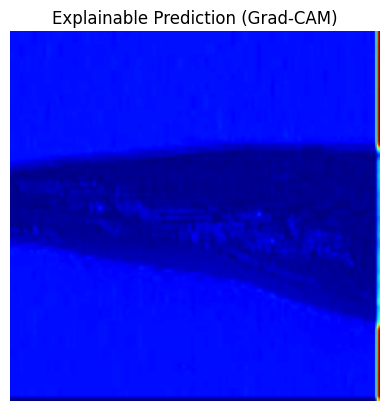

In [87]:
import matplotlib.pyplot as plt
import cv2

if output["status"] == "confident":
    plt.imshow(cv2.cvtColor(output["gradcam"], cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title("Explainable Prediction (Grad-CAM)")
    plt.show()
else:
    print("Prediction is uncertain.")
    print("Confidence:", output["confidence"])
    print("Please provide a clearer image.")


In [88]:
model.save("rice_model.keras")